# Depuración y análisis estadístico de anotaciones genómicas KEGG de *Streptomyces lividans* TK24 como base para la construcción de un modelo metabólico a escala genómica

Los modelos metabólicos a escala genómica  son una forma exhaustiva de representar el conjunto completo de reacciones metabólicas que ocurren en una célula, siendo así una importante estrategia en la compresión y predicción de las respuestas de los organismos ante variaciones genéticas y/o ambientales.
Esta estrategia de modelado requieren como primer paso la obtención de una lista curada de genes asociados a funciones celulares funciones mebólicas, productos, y reacciones. *Streptomyces lividans* TK24, microorganismo de interés industrial, es una cepa bien caracterizada genéticamente y existen anotaciones genómicas en distintas bases de datos. Sin embargo, hay genes sin función asignada, otros con anotaciones poco específicas o redundantes y la información se encuentra dispersa. Por ello, antes de incorporar la información genética, es necesario contar con un conjunto de datos limpios y analizados de las anotaciones metabólicas, aunque siempre es necesario realizar una curación manual, es necesario contar con datos organizados y depurados para una mayor facilidad de tratamiento.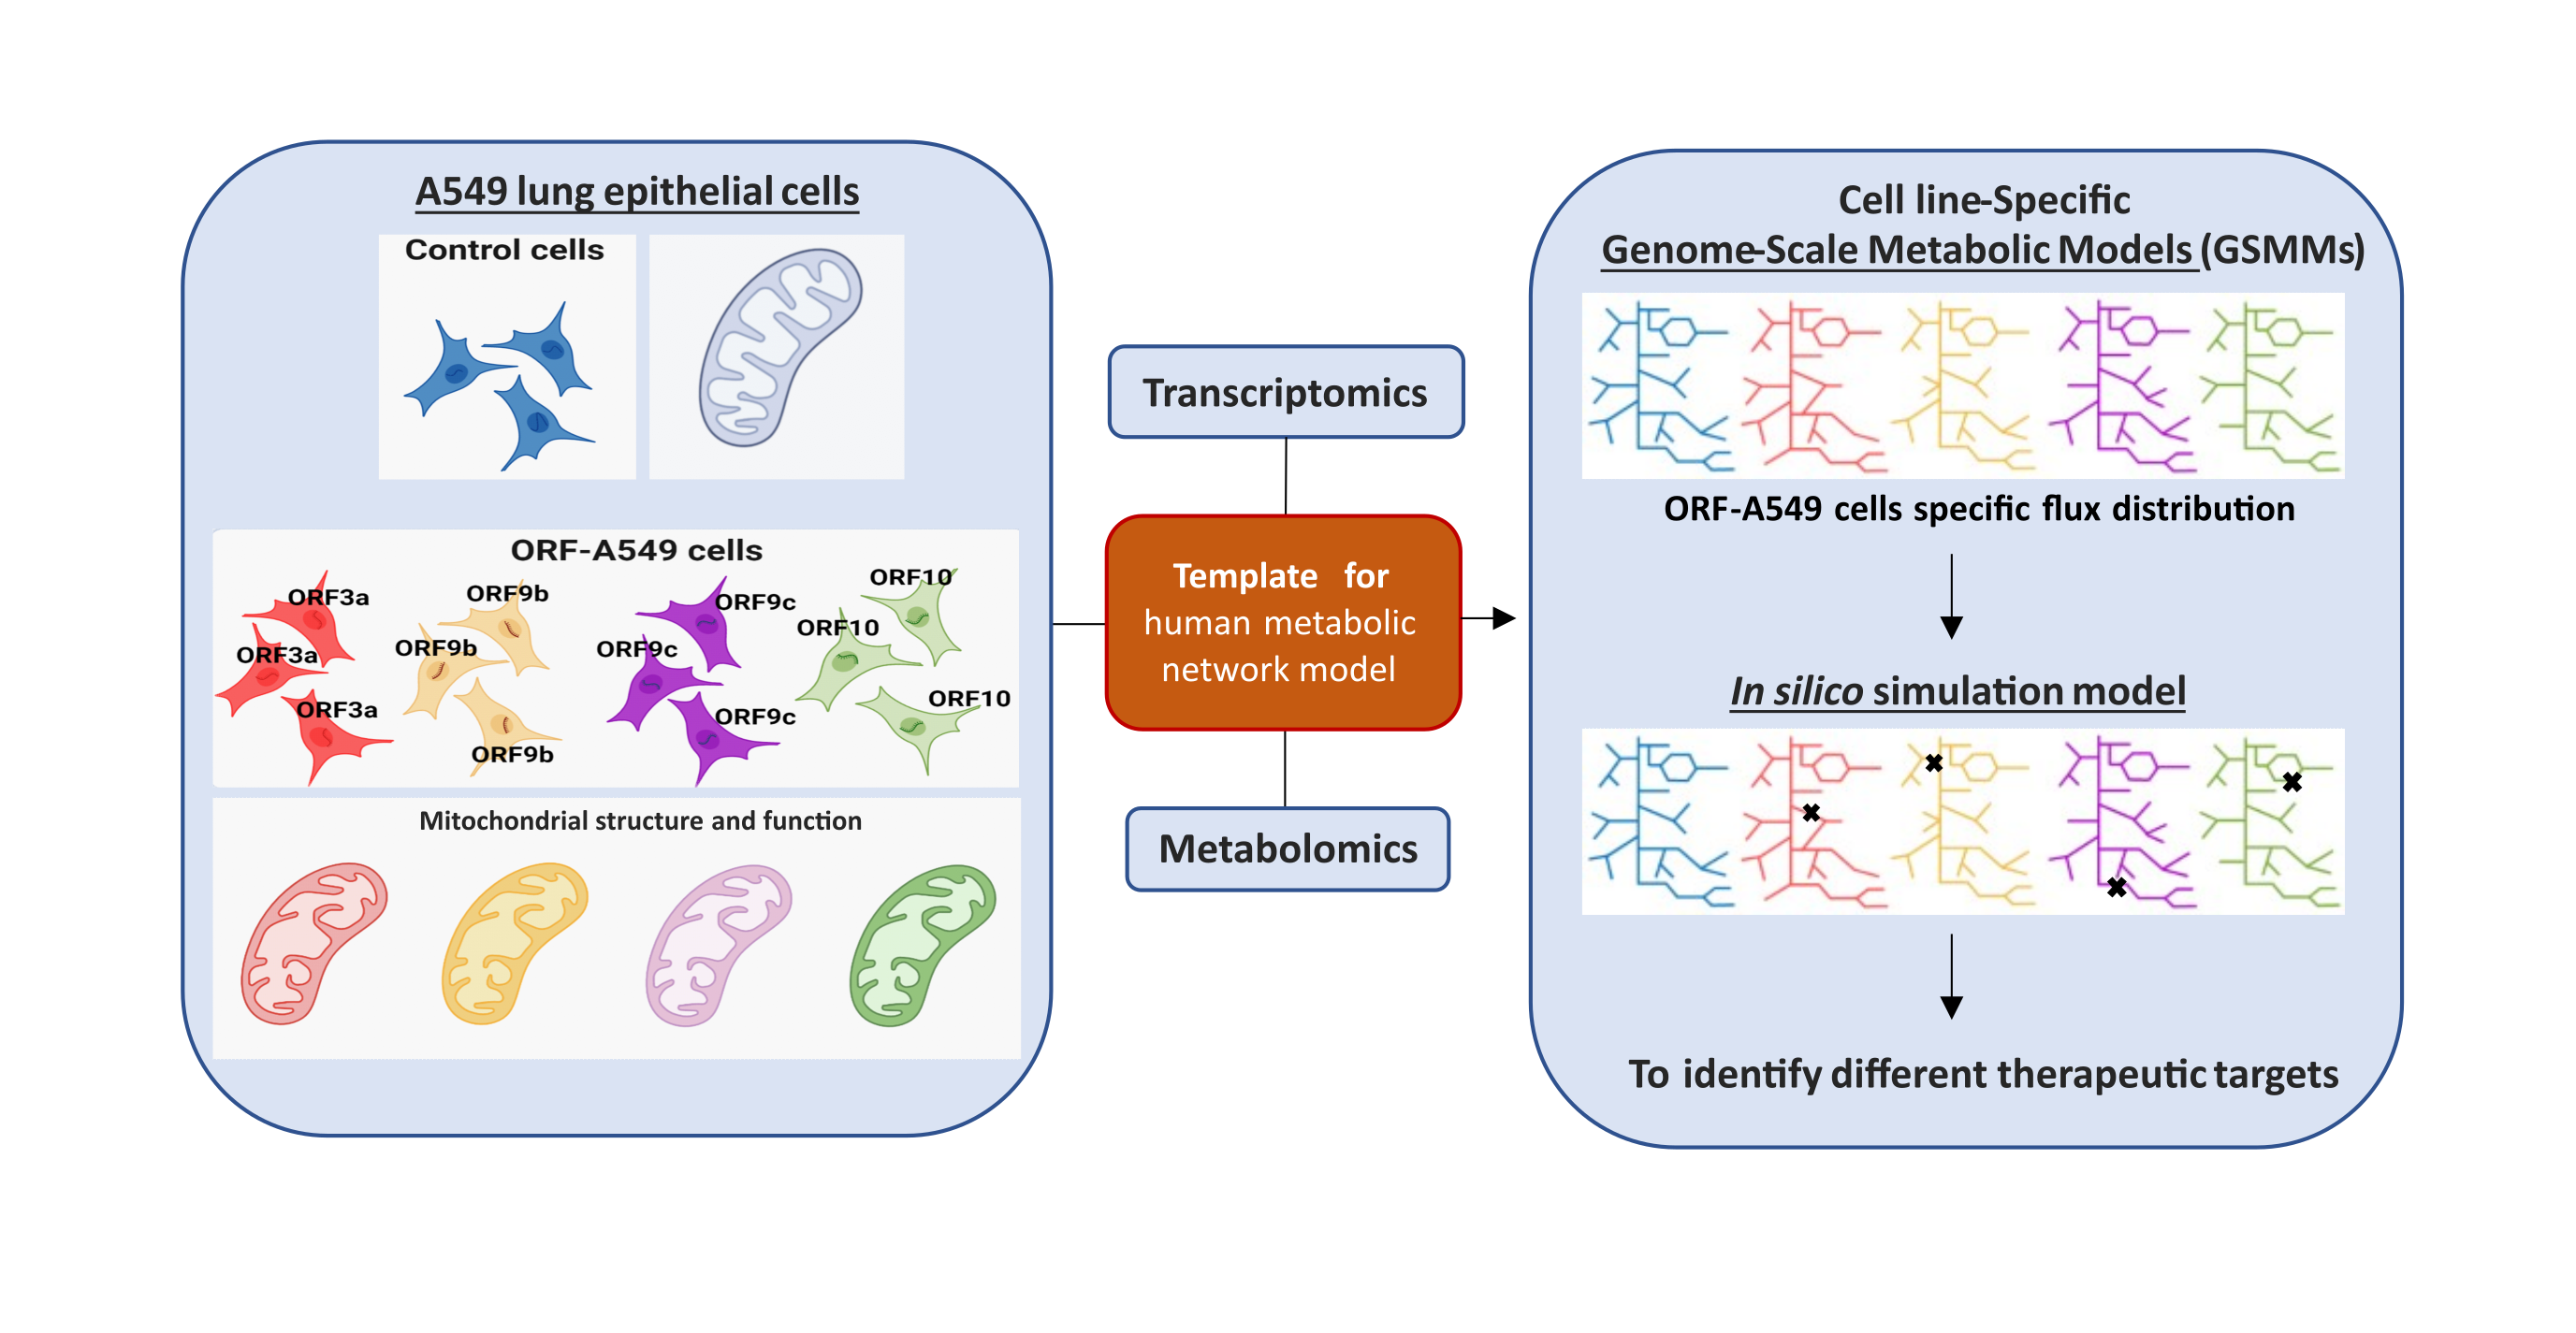


De acuerdo con lo anterior, se propone la depuración y análisis descriptivo de los datos obtenidos a partir de la base de datos KEGG (https://www.kegg.jp/brite/query=01100&htext=br08901.keg&option=-a&node_proc=br08901_org&proc_enabled=slv&panel=collapse), ya que contiene un compendio de información metabólica bastante rica y completa que resulta de gran utilidad para su incoorporación al modelo.

# **Objetivo general**

Depurar y analizar estadísticamente las anotaciones genómicas provenientes de la base de datos KEGG de *Streptomyces lividans* TK24 para obtener un conjunto de datos estructurados de genes y funciones metabólicas que sirva como punto de
partida para la construcción de un modelo metabólico a escala genómica del microorganismo.

# **Objetivos específicos**

1. Construir un DataFrame en Python con la información relevante por gen: identificador,
producto, función, número EC, código KO, ruta metabólica, etc.
2. Definir criterios de “gen con función/función metabólica” (p.ej. presencia de EC, pertenencia a vías
KEGG, término metabólico).
3. Realizar un análisis exploratorio de datos (EDA); conteos de genes por categoría funcional, proporción de genes metabólicos vs no metabólicos,
rutas metabólicas mejor/más pobremente anotadas.
4. Aplicar análisis estadístico y visualización: tablas de contingencia (por ejemplo: tipo de
función vs tipo de ruta), gráficas de barras, histogramas, heatmaps, correlaciones simples
entre variables cuantitativas (longitud, nº de dominios, etc.).
5. Generar una lista priorizada de genes y reacciones candidatas para el futuro modelo
metabólico.

# **Análisis realizado**

# **1. Solicitar las paqueterías que se van a utilizar**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **2. Cargar el documento**

Cargué el documento obtenido en excel en Gig Hub y lo guardé en formato .cvs (delimitado por coma), y así pude cargar los datos "crudos" desde Gib Hub.

In [3]:
ruta='https://raw.githubusercontent.com/Auro-Hernandez/Clase-an-lisis-de-datos-con-Python/refs/heads/main/KEGG_KO%20annotations_%20v3.csv'

In [4]:
df = pd.read_csv(ruta) # Para poder leer el archivo
df.head()

,Gene,KO,Function,Pathway type
0,A09100 Metabolism,NaN,NaN,NaN
1,B 09101 Carbohydrate metabolism,NaN,Metabolism,Carbohydrate metabolism
2,C 00010 Glycolysis / Gluconeogenesis [PATH:...,NaN,Metabolism,Carbohydrate metabolism
3,D SLIV_06845 sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
4,D SLIV_07585 sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism


# **3. Limpieza de datos**



*   Eliminar los valores faltantes (NaN)





In [5]:
df.dropna(inplace=True) #Elimina todas las filas que contengan al menos un valor faltante (NaN, None, NULL) y modifica el DataFrame original directamente
df.head()

,Gene,KO,Function,Pathway type
3,D SLIV_06845 sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
4,D SLIV_07585 sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
5,D SLIV_16970 sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
6,D SLIV_27075 glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
7,D SLIV_32410 sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism


In [6]:
df.isna().sum() #Para contar valores faltantes; cuenta los valores faltantes en cada columna
#Ya no hay valores faltantes porque ya los eliminé con "dropna"

,0
Gene,0
KO,0
Function,0
Pathway type,0




*   Obtener una nueva columna que solo contenga los valores Gene ID







*   Eliminar el termino SLIV_XXXXX de la columna "Gen", y renombrar la columna a "Protein"



In [7]:
import re

# Crear la nueva columna 'Gene ID' extrayendo el patrón SLIV_XXXXX
df['Gene ID'] = df['Gene'].str.extract(r'(SLIV_\d{5})')

# Eliminar el término SLIV_XXXXX (y el espacio siguiente) de la columna 'Gene'
df['Gene'] = df['Gene'].str.replace(r'\bSLIV_\d{5}\b\s*', '', regex=True)

# Renombrar la columna 'Gene' a 'Protein'
df.rename(columns={'Gene': 'Protein'}, inplace=True)

# Mostrar las primeras filas del DataFrame actualizado para verificar los cambios
df.head()

,Protein,KO,Function,Pathway type,Gene ID
3,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,SLIV_06845
4,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,SLIV_07585
5,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,SLIV_16970
6,D glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,SLIV_27075
7,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,SLIV_32410




*   Colar la columna Gen ID al inicio de la tabla



In [8]:
# Obtener la lista actual de columnas
columnas = df.columns.tolist()

# Mover 'Gene ID' al inicio de la lista
columnas.insert(0, columnas.pop(columnas.index('Gene ID')))

# Reindexar el DataFrame con el nuevo orden de columnas
df = df[columnas]

# Mostrar las primeras filas del DataFrame actualizado para verificar los cambios
df.head()

,Gene ID,Protein,KO,Function,Pathway type
3,SLIV_06845,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
4,SLIV_07585,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
5,SLIV_16970,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
6,SLIV_27075,D glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism
7,SLIV_32410,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism




*   EXtraer los terminos "EC" en una nueva columna



In [9]:
import re

# Define the regular expression pattern to find 'EC:X.Y.Z.W'
# This pattern looks for 'EC:' followed by digits and dots
ec_pattern = r'EC:(\d+\.\d+\.\d+\.\d+)'

# Extract the EC numbers into a new column
df['EC number'] = df['KO'].str.extract(ec_pattern)

df.head()

,Gene ID,Protein,KO,Function,Pathway type,EC number
3,SLIV_06845,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
4,SLIV_07585,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
5,SLIV_16970,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
6,SLIV_27075,D glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
7,SLIV_32410,D sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2


# **Nota:**
El módulo re en Python (abreviatura de Regular Expressions o Expresiones Regulares) se utiliza para trabajar con secuencias de caracteres que definen un patrón de búsqueda. Es la herramienta principal para realizar operaciones complejas de búsqueda, manipulación y validación de texto que van más allá de las funciones básicas de string.
Esta herramienta me es muy importante para definir, depurar y estructurar mis datos, ya que el archivo general agrupa muchos terminos en una sola columna haciendo dificultando su uso.



*   Quitar la letra "D" de la columna "Protein"



In [10]:
df['Protein'] = df['Protein'].str.replace('D', '', regex=False) #Es decir, de la columna "Protein", de un termino str quitar el carácter D, con "False" se anula dicho carácter

df.head()

,Gene ID,Protein,KO,Function,Pathway type,EC number
3,SLIV_06845,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
4,SLIV_07585,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
5,SLIV_16970,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
6,SLIV_27075,glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
7,SLIV_32410,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2


In [11]:
df.set_index('Gene ID') #Para que el indice sea el nombre del gen

,Protein,KO,Function,Pathway type,EC number
Gene ID,,,,,
SLIV_06845,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
SLIV_07585,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
SLIV_16970,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
SLIV_27075,glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
SLIV_32410,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2
...,...,...,...,...,...
SLIV_34075,hypothetical protein,K09958 K09958; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN
SLIV_31835,hypothetical protein,K09959 K09959; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN
SLIV_29985,hypothetical protein,K09981 K09981; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN


In [12]:
df['KO_Code_Raw'] = df['KO'].str.split(';', expand=True)[0]

# Limpiar espacios en blanco alrededor de los términos si es necesario
df['KO code'] = df['KO_Code_Raw'].str.strip()


# Eliminar las columnas temporales si ya no son necesarias
df.drop(columns=['KO_Code_Raw'], inplace=True)

df.head()

,Gene ID,Protein,KO,Function,Pathway type,EC number,KO code
3,SLIV_06845,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk
4,SLIV_07585,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk
5,SLIV_16970,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk
6,SLIV_27075,glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk
7,SLIV_32410,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk


Ahora ya se tiene una tabla con información limpia y ordenada, donde los principales indentificadores están determinados.

Nota: No se volvió a hacer limpieza de datos faltantes porque quizá sea útil conservarlos.

# **4. Obtención general y estadística**

In [13]:
df.info() #Para obtener información general del DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 5321 entries, 3 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gene ID       5139 non-null   object
 1   Protein       5321 non-null   object
 2   KO            5321 non-null   object
 3   Function      5321 non-null   object
 4   Pathway type  5321 non-null   object
 5   EC number     3173 non-null   object
 6   KO code       5321 non-null   object
dtypes: object(7)
memory usage: 332.6+ KB


Curiosamente, podemos notar que no todas las proteínas tienen un gen asociado. Tampoco todas las proteínas cuentan con un código KO.

Lógicamente, todos los datos son del tipo "Objeto"

In [14]:
df.describe(include='all') #Genera estadísticas descriptivas de las columnas numéricas o no


,Gene ID,Protein,KO,Function,Pathway type,EC number,KO code
count,5139,5321,5321,5321,5321,3173,5321
unique,2824,1897,1864,8,32,881,1864
top,SLIV_13810,hypothetical protein,K00626 ACAT; acetyl-CoA C-acetyltransferase [E...,Metabolism,Protein families: signaling and cellular proce...,2.7.13.3,K00626 ACAT
freq,14,444,60,2128,788,65,60


# **OBSERVACIONES**

* Podemos observar que hay muchos genes y proteínas que se repiten, sin embargo, no los voy a eliminar de manera automática ya que están invoucrados en diferentes funciones y/o rutas y se requeriría una curación manual para poder eliminarlos.
* De igual forma, hay muchos terminos "EC" y "KO" que se repiten, sin embargo, no los eliminaré de manera automática ya que estos están involucrados en multiples funciones que podrían servivir para un posterior análisis.

*   Al ser elementos de tipo "objeto", este es todo el análisis estadístico que se puede obtener.
  





In [15]:

# Para verificar duplicados en columnas específicas
df.duplicated(subset=['Gene ID']).sum()


np.int64(2496)

In [16]:
df.duplicated(subset=['Protein']).sum()

np.int64(3424)

# **5. Definición de la etiqueta “metabólico / no metabólico” u otro**

Crear una columna booleana, por ejemplo: metabólico = 1 si:
está asignado a:

*   Está asignado a una ruta metabólica




In [17]:
# Creamos una nueva columna 'Function type' basada en si tiene función metabólica u otra
# Utilizaremos un enfoque de mapeo para mayor claridad y facilidad de expansión

def get_function_type(function_str):
    function_str_lower = function_str.lower()
    if 'metabolism' in function_str_lower:
        return '1'
    elif 'genetic information processing' in function_str_lower:
        return '2'
    elif 'environmental information processing' in function_str_lower:
        return '3'
    elif 'cellular processes' in function_str_lower:
        return '4'
    elif 'organismal systems' in function_str_lower:
        return '5'
    elif 'human diseases' in function_str_lower:
        return '6'
    elif 'brite hierarchies' in function_str_lower:
        return '7'
    elif 'not included in pathway or brite' in function_str_lower:
        return '8'
    else:
        return '0' # Para cualquier otra categoría no especificada

df['Function type'] = df['Function'].apply(get_function_type)

display(df[['Function', 'Function type']].head())

,Function,Function type
3,Metabolism,1
4,Metabolism,1
5,Metabolism,1
6,Metabolism,1
7,Metabolism,1


In [18]:
df

,Gene ID,Protein,KO,Function,Pathway type,EC number,KO code,Function type
3,SLIV_06845,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk,1
4,SLIV_07585,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk,1
5,SLIV_16970,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk,1
6,SLIV_27075,glkA; Glucokinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk,1
7,SLIV_32410,sugar kinase,K25026 glk; glucokinase [EC:2.7.1.2],Metabolism,Carbohydrate metabolism,2.7.1.2,K25026 glk,1
...,...,...,...,...,...,...,...,...
5995,SLIV_34075,hypothetical protein,K09958 K09958; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN,K09958 K09958,8
5996,SLIV_31835,hypothetical protein,K09959 K09959; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN,K09959 K09959,8
5997,SLIV_29985,hypothetical protein,K09981 K09981; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN,K09981 K09981,8
5998,SLIV_36140,hypothetical protein,K09992 K09992; uncharacterized protein,Not included in pathway or brite,Poorly characterized,NaN,K09992 K09992,8


# De esta forma, se ha generado una columna booleana con los 8 tipos de funciones principales catalogadas por KEGG.

# **6.Análisis exploratorio (EDA)**



*   Conteo básico



El número total de genes ya se había obtenido con la información general, en total se tenpina 5 139 genes.

### **Conteo de Gene ID por cada tipo de función**

In [19]:
gene_id_counts = df.groupby('Function type')['Gene ID'].nunique()
display(gene_id_counts)

,Gene ID
Function type,
1,1119
2,220
3,325
4,126
5,10
6,35
7,1525
8,434


De esta forma, se puede contar el número de genes que hay a cada tipo de función, donde se asigna de la siguiente manera:

1: Metabolism
2:Genetic Information Processing
3:Environmental Information Processing
4:Cellular Processes
5:Organismal Systems
6:Human Diseases
7:Brite Hierarchies
8:Not Included in Pathway or Brite

Nota: Desde aquí podemos ir visualizando que una gran porción de los genes codifica para alguna función metabólica.


*   Visualizaciones con matplotlib/seaborn:



Gráfico de barras





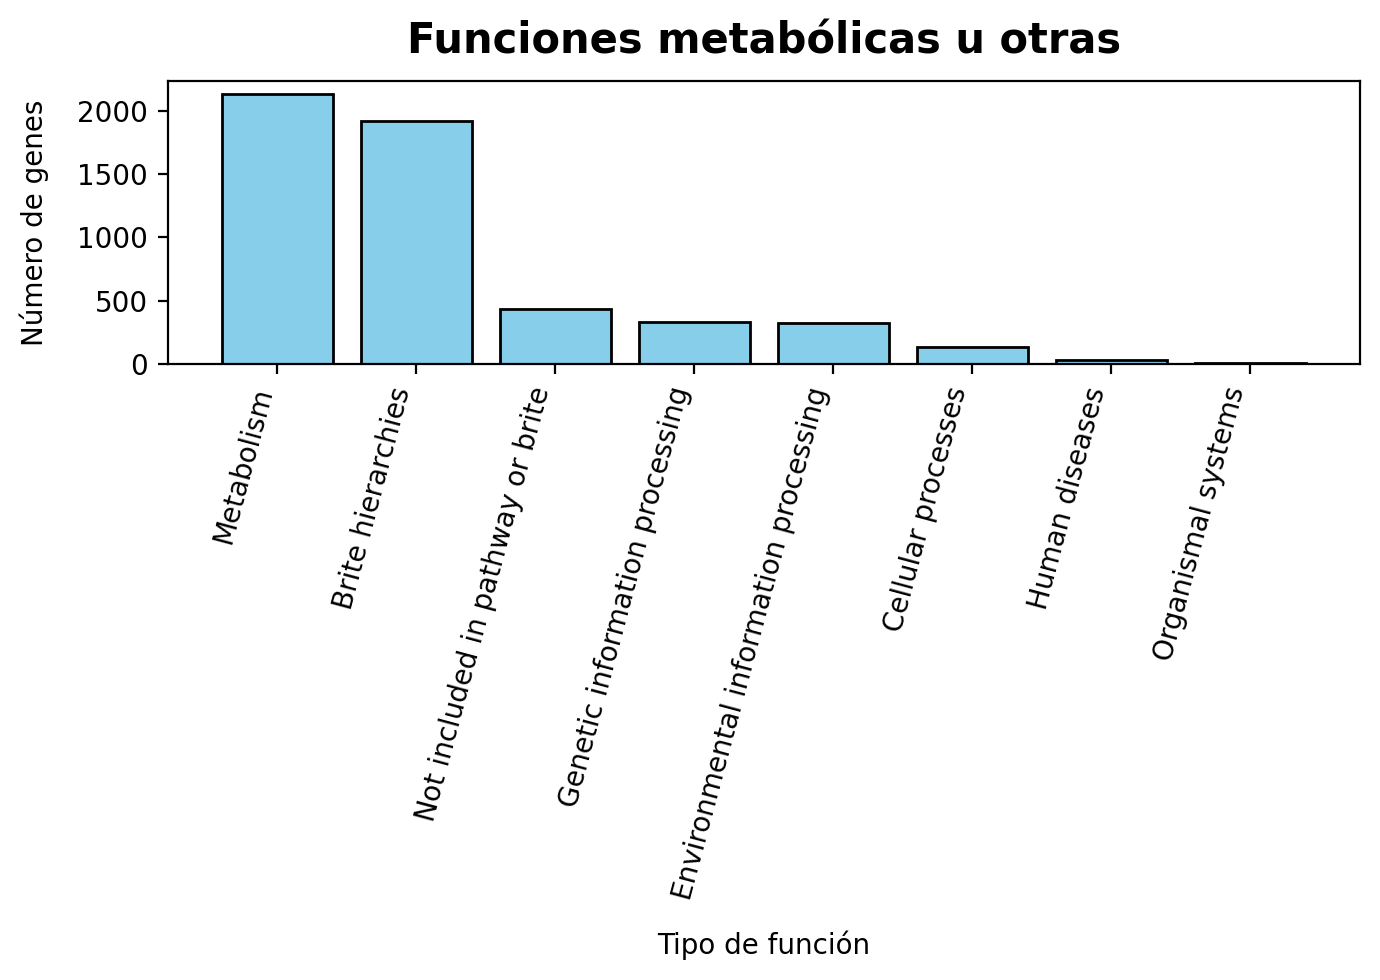

In [20]:
plt.figure(figsize=(7,5), dpi=200)
# Calcular el número de genes para la clasificación 'Function'
pathway_counts = df['Function'].value_counts()
# Trazar el gráfico de barras utilizando los recuentos calculados
plt.bar(pathway_counts.index, pathway_counts.values,
        color='skyblue', edgecolor='black')
plt.title('Funciones metabólicas u otras', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Tipo de función', fontsize=10, labelpad=10)
plt.ylabel('Número de genes', fontsize=10, labelpad=10)
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

Gráfico de pastel

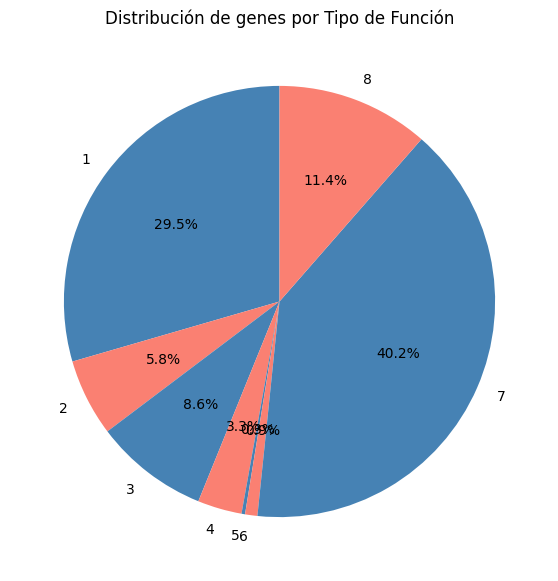

In [22]:
plt.figure(figsize=(7,7))

# Genera un gráfico de pastel (pie chart) con los conteos de genes
# kind='pie': tipo de gráfico circular
# autopct='%1.1f%%': muestra porcentajes con 1 decimal
# startangle=90: inicia el gráfico desde 90° (parte superior)
# colors: asigna colores personalizados a cada sección (azul acero y salmón)
# Se utiliza gene_id_counts que fue definido previamente y es un nombre de variable válido.
gene_id_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['steelblue', 'salmon'])

# Elimina la etiqueta del eje Y (no tiene sentido en gráficos circulares)
plt.ylabel('')

plt.title('Distribución de genes por Tipo de Función')

plt.show()

Ahora, mediante el uso de ChatGTP, se va a mejorar el gráfico de pastel.

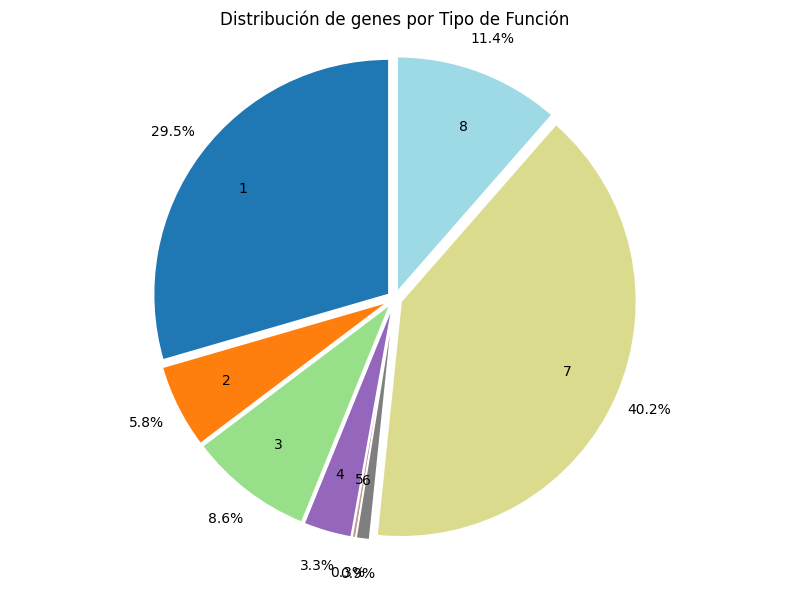

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# —————————————————————————————
# Pie chart: distribución de genes por tipo de función
# —————————————————————————————

# Supone que `gene_id_counts` es una Series de pandas:
# índice → categorías / tipo de función
# valores → conteos de genes

# 1) Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# 2) Generar colores únicos, uno por categoría
#    Usamos un mapa de colores perceptualmente distinguible.
#    Aquí se elige 'tab20' que ofrece hasta 20 tonos distintos.
num_categories = len(gene_id_counts)
cmap = plt.get_cmap('tab20')
colores = cmap(np.linspace(0, 1, num_categories))

# 3) Opciones visuales
explode = [0.03] * num_categories          # separa ligeramente cada porción
wedge_props = {'edgecolor': 'white', 'linewidth': 1.2}
text_props = {'fontsize': 10, 'color': 'black'}

# 4) Dibujar el pie chart
#    - labels dentro del pastel para mostrar el tipo de función
#      usando labeldistance < 1.
#    - porcentajes fuera del pastel para no amontonar con los labels,
#      usando pctdistance > 1.
patch_objects, text_labels, percent_labels = ax.pie(
    gene_id_counts,
    labels=gene_id_counts.index,          # mostrar tipo de función dentro
    labeldistance=0.75,                   # dentro, pero no en el centro
    autopct='%1.1f%%',                    # porcentajes
    pctdistance=1.15,                     # fuera del radio, evita superposición
    startangle=90,
    colors=colores,
    explode=explode,
    wedgeprops=wedge_props,
    textprops=text_props
)

# Set title
ax.set_title('Distribución de genes por Tipo de Función')

# Ensure the circle is drawn as a circle (equal aspect ratio)
ax.axis('equal')

plt.tight_layout()
plt.show()

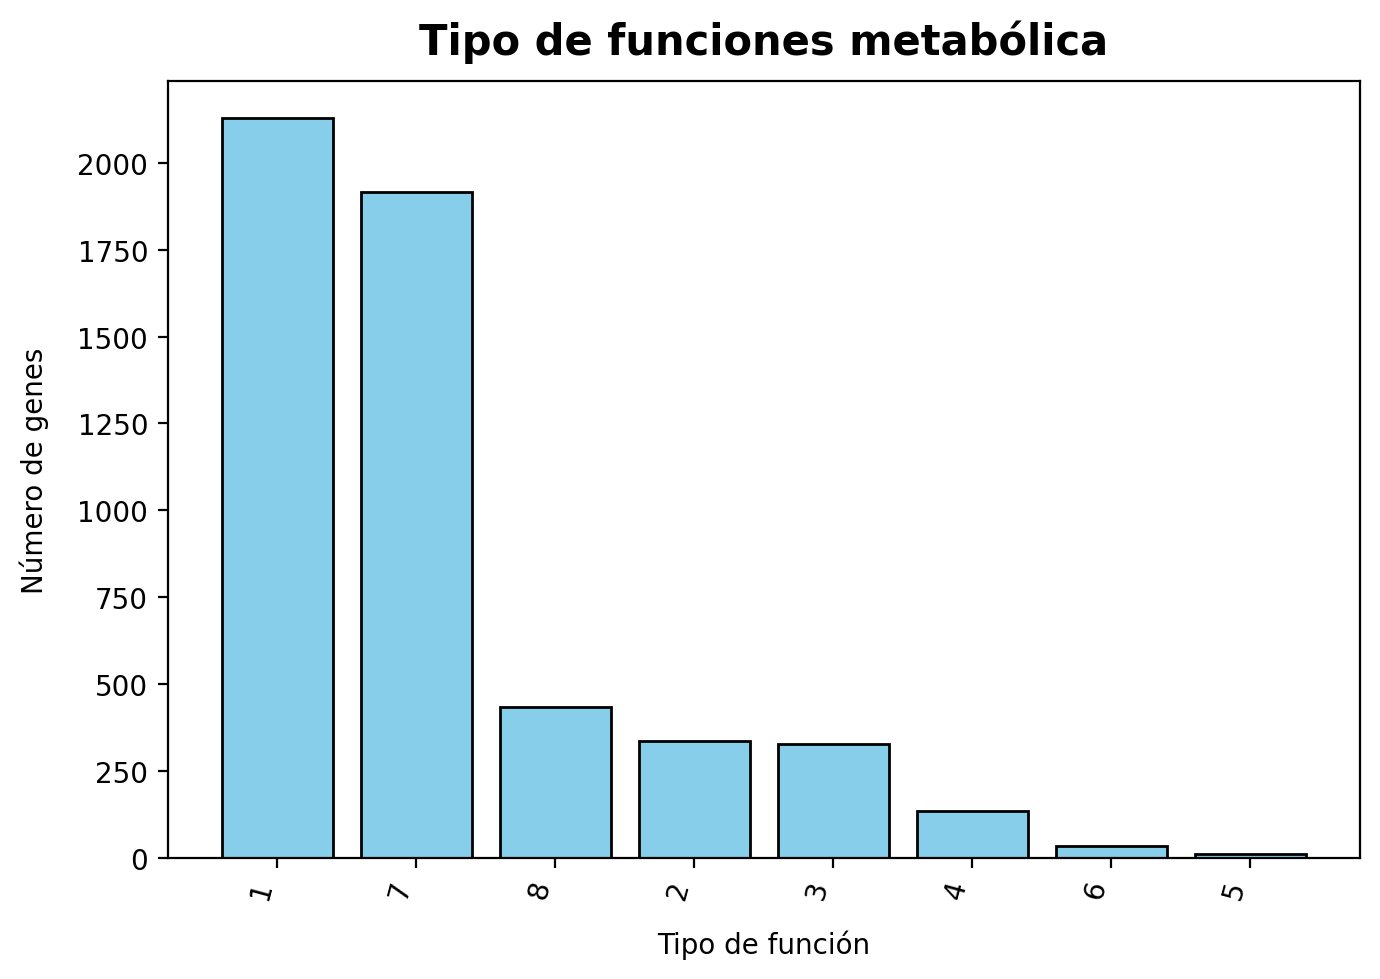

In [24]:
plt.figure(figsize=(7,5), dpi=200)
# Calcular el número de genes para la clasificación 'Function'
pathway_counts = df['Function type'].value_counts()
# Trazar el gráfico de barras utilizando los recuentos calculados
plt.bar(pathway_counts.index, pathway_counts.values,
        color='skyblue', edgecolor='black')
plt.title('Tipo de funciones metabólica', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Tipo de función', fontsize=10, labelpad=10)
plt.ylabel('Número de genes', fontsize=10, labelpad=10)
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# **Análisis estadístico**

In [25]:
print('Máximo', gene_id_counts.idxmax(), gene_id_counts.max()) #Para obtener el "Tipo de función con el valor más alto"

Máximo 7 1525


In [26]:
print('Mínimo', gene_id_counts.idxmin(), gene_id_counts.min()) #Para obtener el "Tipo de función con el valor más bajo"

Mínimo 5 10


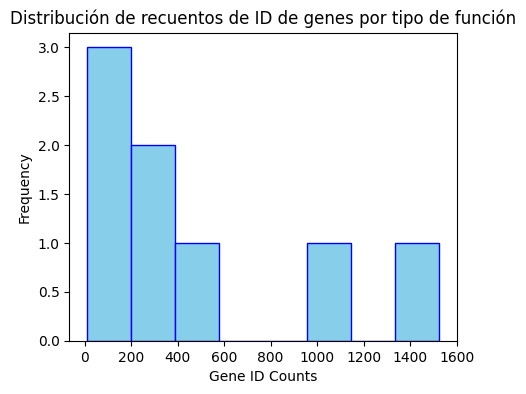

In [27]:
plt.figure(figsize=(5,4))
plt.hist(gene_id_counts.values, bins=len(gene_id_counts), # Utiliza los valores numéricos y establece contenedores para cada categoría.
color='skyblue', edgecolor='blue')
plt.title('Distribución de recuentos de ID de genes por tipo de función')
plt.xlabel('Gene ID Counts')
plt.ylabel('Frequency')
plt.show()

In [28]:
gene_id_counts.skew()


np.float64(1.3329182593126543)

Por tanto, la distribución es asímetrica positiva

In [29]:
curtosis = gene_id_counts.kurt()
print(curtosis)

0.5937308902041272


La curtosis describe el grado en que las colas de una distribución difieren de las colas de una distribución normal.

En este sentido, respecto a la distribución normal tenemos una cola más pesada y un pico más alto y estrecho.

### Tabla de contingencia: Función vs. Tipo de ruta

Una tabla de contigencia es una matriz que resume la frecuencia de observaciones para dos o más variables categóricas, mostrando cómo se relacionan entre sí para identificar patrones, probar independencia y calcular probabilidades condicionales.
En este caso, se presenta una tabla que muestra la distribución de frecuencias de la "tipo de ruta" según el "función". Cada celda de la tabla contiene el número de genes que pertenecen a una combinación específica de función y tipo de ruta.

In [30]:


# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['Function'], df['Pathway type'])
display(contingency_table)

Pathway type,Digestive system,Lipid metabolism,Protein families: metabolism,RNA family,Translation,Amino acid metabolism,Biosynthesis of other secondary metabolites,Carbohydrate metabolism,Cell motility,Cellular community - prokaryotes,...,Protein families: genetic information processing,Protein families: signaling and cellular processes,Replication and repair,Signal transduction,Transcription,Transport and catabolism,Unclassified: genetic information processing,Unclassified: metabolism,Unclassified: signaling and cellular processes,Xenobiotics biodegradation and metabolism
Function,,,,,,,,,,,,,,,,,,,,,
Genetic information processing,0,0,0,0,175,0,0,0,0,0,...,0,0,94,0,5,0,0,0,0,0
Not included in pathway or brite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,36,191,47,0
Brite hierarchies,0,0,398,85,0,0,0,0,0,0,...,646,788,0,0,0,0,0,0,0,0
Cellular processes,0,0,0,0,0,0,0,0,7,97,...,0,0,0,0,0,30,0,0,0,0
Environmental information processing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,111,0,0,0,0,0,0
Human diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Metabolism,0,155,0,0,0,405,116,489,0,0,...,0,0,0,0,0,0,0,0,0,96
Organismal systems,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lo mismo pero para el tipo de función y el Ec number

In [31]:
contingency_table = pd.crosstab(df['Function'], df['EC number']) #Para correlacionar la función con la presencia/ausencia de Ec number
display(contingency_table)

EC number,1.1.1.1,1.1.1.100,1.1.1.103,1.1.1.108,1.1.1.122,1.1.1.132,1.1.1.133,1.1.1.136,1.1.1.157,1.1.1.169,...,7.4.2.1,7.4.2.8,7.5.2.10,7.5.2.4,7.5.2.7,7.6.2.11,7.6.2.14,7.6.2.15,7.6.2.5,7.6.2.9
Function,,,,,,,,,,,,,,,,,,,,,
Genetic information processing,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Not included in pathway or brite,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brite hierarchies,0,11,0,0,0,0,0,0,0,0,...,3,7,1,2,2,1,2,1,1,4
Cellular processes,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Environmental information processing,0,0,0,0,0,1,0,0,0,0,...,1,4,1,2,2,1,2,1,0,4
Human diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Metabolism,12,33,1,0,4,2,3,2,12,2,...,0,0,0,0,0,0,2,0,0,0
Organismal systems,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora con KO code

In [32]:
# Create the contingency table
contingency_table = pd.crosstab(df['Function'], df['KO code']) #Para correlacionar la función con la presencia/ausencia de KO coder

# Display the contingency table
display(contingency_table)

KO code,K00003 hom,K00010 iolG,K00012 UGDH,K00013 hisD,K00019 BDH1,K00020 HIBADH,K00024 mdh,K00027 ME2,K00031 IDH1,K00033 PGD,...,K27596 accA2,K27675 redI,K27681 pgsA,K27802 acnA,K27837 cdhC,K27842 E3.1.3.111,K28029 UGA4,K28218 chsH3,K28224 scdD,K28297 relB_F
Function,,,,,,,,,,,,,,,,,,,,,
Genetic information processing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Not included in pathway or brite,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
Brite hierarchies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
Cellular processes,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Environmental information processing,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Human diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Metabolism,6,6,4,1,1,1,8,2,3,6,...,0,1,1,4,0,0,0,1,1,0
Organismal systems,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Mapa de calor

Para visulizar la relación entre el tipo de función y el tipo de ruta.


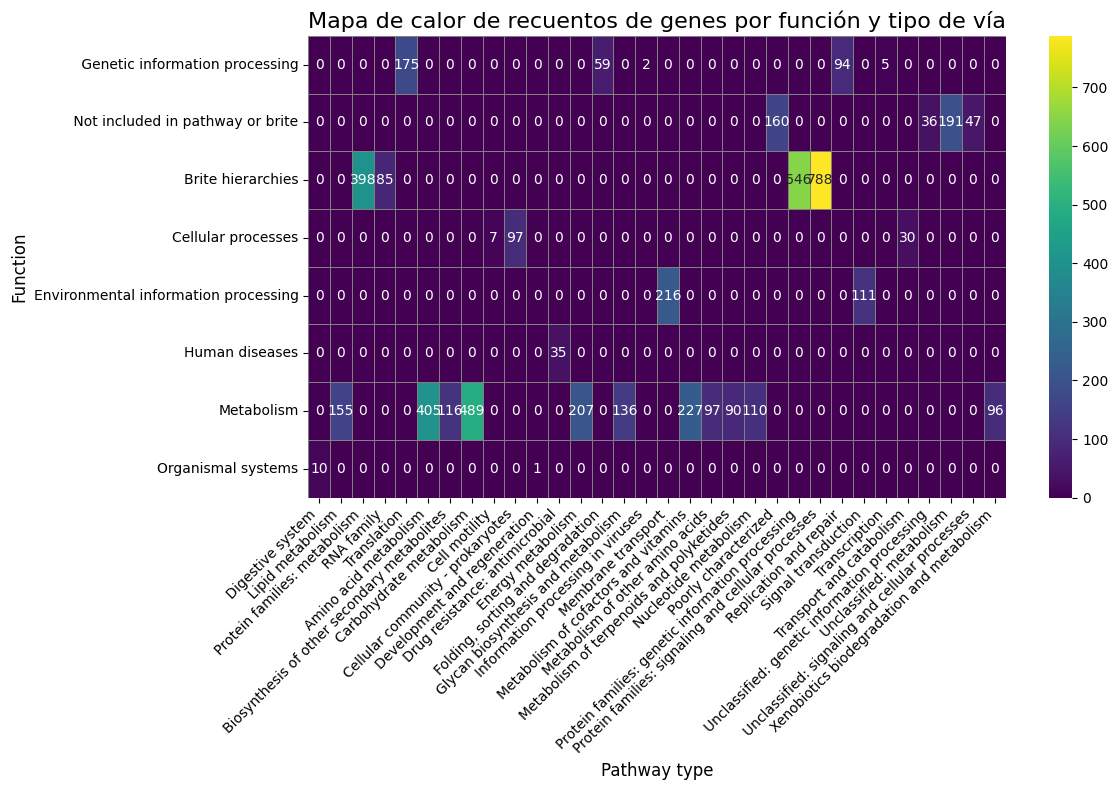

In [33]:
import seaborn as sns

#Crear la tabla de contingencia con el nombre de columna correcto
contingency_table_function_type = pd.crosstab(df['Function'], df['Pathway type'])

# Configurar la figura de matplotlib
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(contingency_table_function_type,
            annot=True,    # Mostrar los valores numéricos en cada celda
            fmt='d',       # Formatear anotaciones como números enteros
            cmap='viridis',# color del mapa
            linewidths=.5, #Agregar líneas entre celdas
            linecolor='gray')

plt.title('Mapa de calor de recuentos de genes por función y tipo de vía', fontsize=16)
plt.xlabel('Pathway type', fontsize=12)
plt.ylabel('Function', fontsize=12)
plt.xticks(rotation=45, ha='right') # Gire las etiquetas del eje x para una mejor legibilidad
plt.yticks(rotation=0) #Mantener las etiquetas del eje y horizontales
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

### Recuento de valores para el tipo de función

Para ver la distribución de todos los tipos de función y comprender sus frecuencias, podemos usar `value_counts()`.

"Value Counts for 'Function type':"

,count
Function type,
1,2128
7,1917
8,434
2,335
3,327
4,134
6,35
5,11


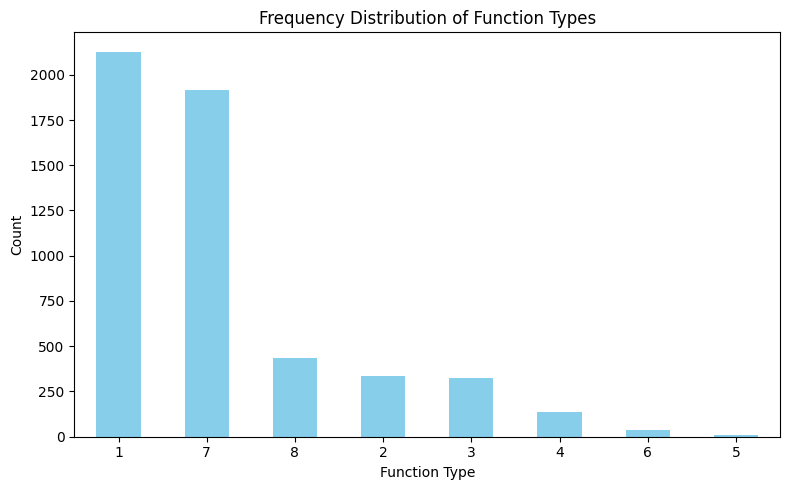

In [34]:
# Obtener los recuentos de valores para la columna 'Tipo de función'
function_type_counts = df['Function type'].value_counts()
display("Value Counts for 'Function type':")
display(function_type_counts)

# Visualizarlo en un gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
function_type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Function Types')
plt.xlabel('Function Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### T-test entre grupos

Como se explicó, una prueba t requiere una columna numérica y dos grupos para comparar. Supongamos que queremos comparar una puntuación hipotética entre dos categorías de tipo de función, por ejemplo, 1 (Metabolismo) y 7 (Jerarquías Brite).

In [35]:
import numpy as np
from scipy import stats
import pandas as pd

# Paso 1: Crear la columna numérica

np.random.seed(42) # Para reproducibilidad
df['Score'] = np.random.normal(loc=50, scale=10, size=len(df)) # Puntuación basw

# Ajuste ligeramente las puntuaciones para 'Tipo de función 1' y 'Tipo de función 7'
df.loc[df['Function type'] == '1', 'Score'] = np.random.normal(loc=55, scale=8, size=df[df['Function type'] == '1'].shape[0])
df.loc[df['Function type'] == '7', 'Score'] = np.random.normal(loc=45, scale=8, size=df[df['Function type'] == '7'].shape[0])

display(df[['Function type', 'Score']].head())

,Function type,Score
3,1,45.412863
4,1,63.673586
5,1,56.682424
6,1,56.587148
7,1,54.926541


### Realización de la prueba t de muestras independientes


Ahora que tenemos una columna numérica ('Puntuación') y grupos categóricos ('Tipo de función'), podemos realizar una prueba t de muestras independientes para ver si existe una diferencia significativa entre las medias de 'Puntuación' para dos tipos de función seleccionados.

In [36]:
import numpy as np
from scipy import stats
import pandas as pd

# Paso 2: Define los dos grupos que quieres comparar
# Por ejemplo, comparemos 'Tipo de función 1' y 'Tipo de función 7'
group1_label = '1' # Metabolism
group2_label = '7' # Brite Hierarchies

# Extraer los datos numéricos de cada grupo
group1_data = df[df['Function type'] == group1_label]['Score']
group2_data = df[df['Function type'] == group2_label]['Score']

# Asegúrese de que haya suficientes datos en ambos grupos
if len(group1_data) == 0 or len(group2_data) == 0:
    print(f"Warning: One or both groups ({group1_label}, {group2_label}) are empty. Cannot perform t-test.")
else:
    # Paso 3: Realizar la prueba t de muestras independientes ---
# Usaremos `equal_var=False` (prueba t de Welch), que no asume la misma varianza poblacional.
# Esto suele ser más seguro cuando no se está seguro de la igualdad de varianzas.
    t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)

    # Paso 4: Interpretar los resultados
    alpha = 0.05 # Nivel de significancia

    print(f"Independent T-test between Function Type {group1_label} and Function Type {group2_label}:")
    print(f"  Mean of Group {group1_label}: {group1_data.mean():.2f}")
    print(f"  Mean of Group {group2_label}: {group2_data.mean():.2f}")
    print(f"  T-statistic: {t_statistic:.3f}")
    print(f"  P-value: {p_value:.3f}")

    if p_value < alpha:
        print(f"  Since p-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
        print(f"  There is a statistically significant difference between the mean 'Score' of Function Type {group1_label} and Function Type {group2_label}.")
    else:
        print(f"  Since p-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
        print(f"  There is no statistically significant difference between the mean 'Score' of Function Type {group1_label} and Function Type {group2_label}.")

Independent T-test between Function Type 1 and Function Type 7:
  Mean of Group 1: 54.73
  Mean of Group 7: 45.11
  T-statistic: 37.447
  P-value: 0.000
  Since p-value (0.000) < alpha (0.05), we reject the null hypothesis.
  There is a statistically significant difference between the mean 'Score' of Function Type 1 and Function Type 7.


Recordar que esta prueba parte de una hipótesis nula que afirma que la muestra sí proviene de una distribución normal. Como en este caso el valor p fue menor a cero, la hipótesis se rechaza y las muestras no provienen de una distribución normal.

# **Conclusión**

Se logró obtener una tabla de datos mucho más ordenada, listos para una curación manual que podrá ser utilizada para la construcción del GEM. De igual forma, se pude obsevar la distribución de los datos, es decir, como están distrubuidos los genes respecto a su función y tipo de ruta. Lo anterior ayuda a tener una mejor comprensión de los datos y de como están distribuidos.